
# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

The dataset contains information about doctor appointmnets and if a patient misses the appointment or not. The data was collected in Brazilia.

During the analysis i will look at the following questions:
- How many patients miss their appointment?
- Is there a difference between men and women?
- Does a disease influence appointments?
- Does a reminder sms help?
- Is there a diffrence between ages?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>

## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### General Observations
- Looks like no data is missing. I will drop PatientId and AppointmentID, they won't have an influence if a patient shows up to his appointment.
- I will convert ScheduledDay and AppointmentDay to Dates. This will make it easier to work with.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- An age of -1 doesn't sound reasonable. 
- 115 seems also odd, but the eldest human died with 122.
- A max value of 4 for Handcap seems to be wrong.
According to the description here https://www.kaggle.com/joniarroba/noshowappointments Handcap is a boolean, so i will treat values greater than zero as true.

In [5]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only one entry, i will remove it.

In [6]:
df[df['Age'] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


This seems to be possible.

### Data Cleaning (Replace this with more specific notes!)

Here is what i will change:
1. Remove the two id columns
2. Rename the columns **SMS_received** and **No-show** to be consistent with the other column names.
3. Remove the -1 age entry
4. Convert strings to dates


In [7]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [8]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.rename(columns={'No-show' : 'NoShow', 'SMS_received' : 'SMSReceived'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df = df[df['Age'] >= 0]

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMSReceived       110526 non-null int64
NoShow            110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


<a id='eda'></a>

## Exploratory Data Analysis

### How many patients miss their appointment?

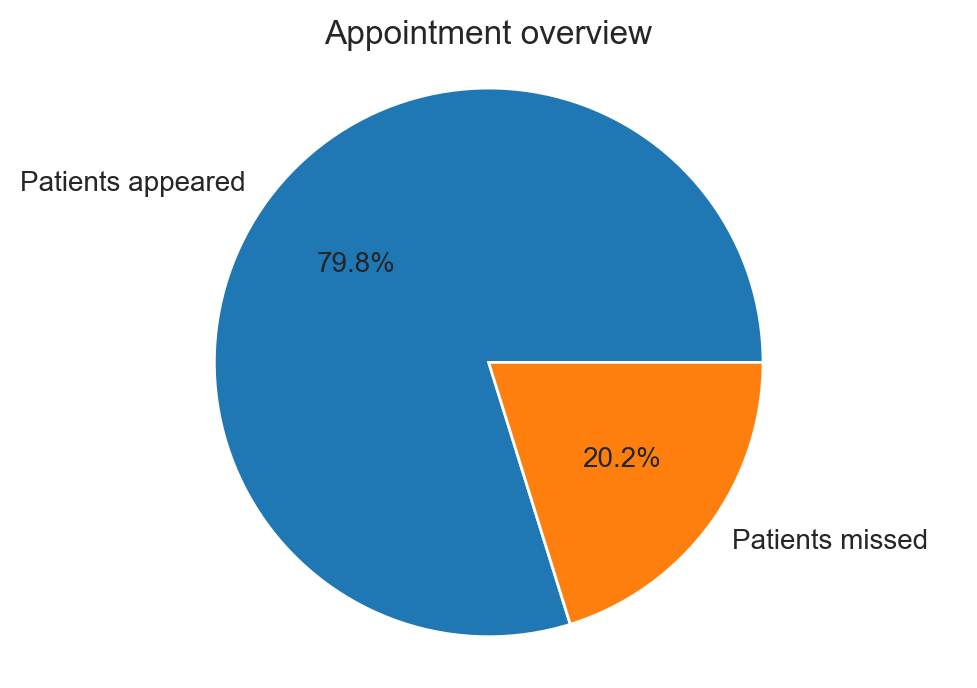

In [13]:
show = len(df[df['NoShow'] == 'No'])
no_show = len(df['NoShow']) - show 

labels = ['Patients appeared', 'Patients missed']
fig, ax = plt.subplots()

fig.dpi = 100

ax.pie([show, no_show], labels=labels, autopct='%1.1f%%')
ax.axis('equal')
#ax.legend()

ax.set_title("Appointment overview")

plt.show();

In [14]:
df['NoShow'].value_counts(normalize=True)

No     0.798066
Yes    0.201934
Name: NoShow, dtype: float64

In [15]:
def get_missed_appointments(df, normalize=True):
    return df['NoShow'].value_counts(normalize=normalize)['Yes']

In [16]:
total_missed = get_missed_appointments(df)
total_missed

0.20193438647919945

### Observation:
About 20% of patients miss their appointment.

### Is there a difference between men and women?

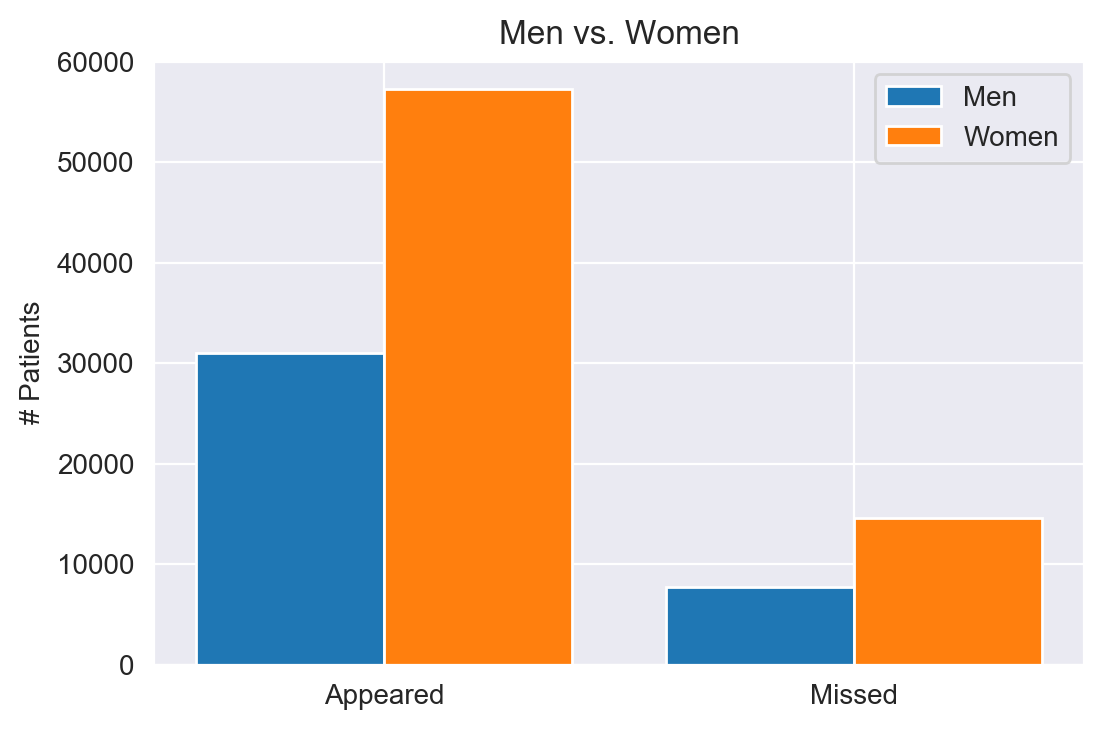

In [17]:
men = df.query('Gender == "M"')
women = df.query('Gender == "F"')

show_men = len(men[men['NoShow'] == 'No'])
no_show_men = len(men['NoShow']) - show_men


show_women = len(women[women['NoShow'] == 'No'])
no_show_women = len(women['NoShow']) - show_women 

fig, ax = plt.subplots()

fig.dpi = 100
ax.bar([1,2], [show_men, no_show_men], 
       tick_label=["Appeared", "Missed"],
       label="Men", 
       width=-0.4,
       align="edge"
)
ax.bar([1,2], [show_women, no_show_women], 
       label="Women", 
       tick_label=["Appeared", "Missed"],
       width=0.4,
       align="edge"
)

ax.legend()

ax.set_title("Men vs. Women")
ax.set_xlabel("")
ax.set_ylabel("# Patients")

plt.show();

In [18]:
get_missed_appointments(men)

0.19967947889471915

In [19]:
get_missed_appointments(women)

0.20314870752655242

In [20]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

### Observation:
The gender doesn't seem to make a difference if a patient misses an appointment or not. But overall it looks like women take more care about their health.

### Does a disease influence appointments?

In [21]:
alcoholism = get_missed_appointments(df.query('Alcoholism >= 1'))
alcoholism

0.20148809523809524

In [22]:
hipertension = get_missed_appointments(df.query('Hipertension >= 1'))
hipertension

0.17301958625751113

In [23]:
diabetes = get_missed_appointments(df.query('Diabetes >= 1'))
diabetes

0.18003273322422259

In [24]:
handcap = get_missed_appointments(df.query('Handcap >= 1'))
handcap

0.18161535029004908

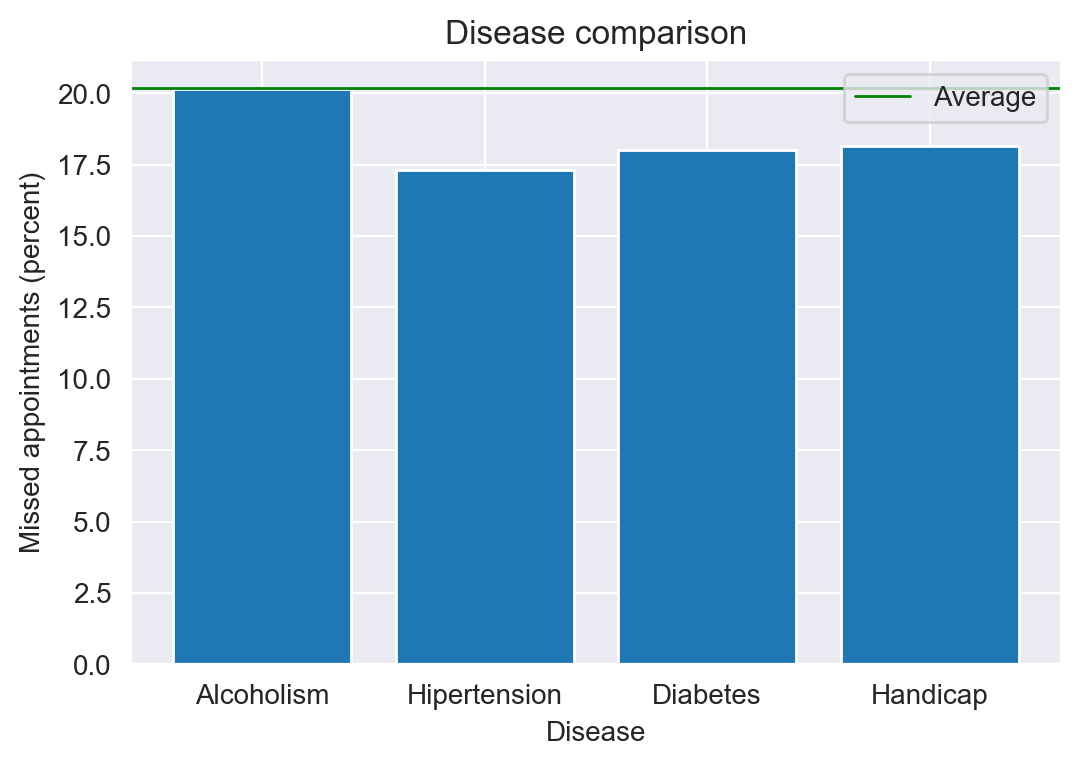

In [25]:
fig, ax = plt.subplots()

fig.dpi = 100
 
labels = ('Alcoholism', 'Hipertension', 'Diabetes', 'Handicap')
y_pos = np.arange(len(labels))
values = (alcoholism * 100, hipertension * 100, diabetes * 100, handcap * 100)
ax.bar(y_pos, values, align='center', tick_label = labels)

ax.set_title("Disease comparison")
ax.set_xlabel("Disease")
ax.set_ylabel("Missed appointments (percent)")
ax.axhline(total_missed * 100, color='green', linewidth=1, label='Average')
ax.legend()
plt.show();

### Observation:
People with a disease are more likely to show up at their appointments than other.

### Does an sms help?

In [26]:
get_missed_appointments(df.query('SMSReceived == 1'))

0.27574544839637

### Observation:
This is surprising, but it looks like a reminder via sms has a negative impact.

### Is there a difference between age?

In [27]:
def get_age_group(dframe, lower, upper = 0):
    if upper > 0:
        return dframe[(dframe['Age'] >= lower) & (dframe['Age'] < upper)]
    else:
        return dframe[dframe['Age'] >= lower]

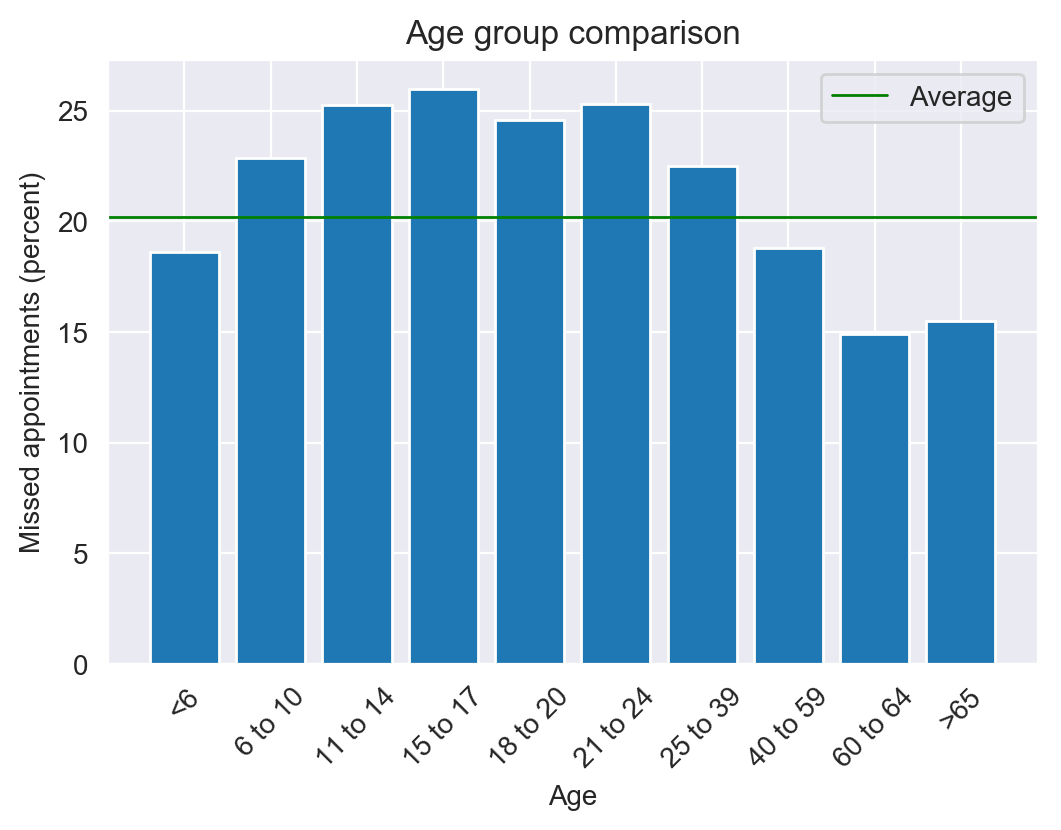

In [28]:
under_6 = get_missed_appointments(get_age_group(df, 0, 6))
six_to_10 = get_missed_appointments(get_age_group(df, 6, 11))
eleven_to_14 = get_missed_appointments(get_age_group(df, 11, 15))
fifteen_to_17 = get_missed_appointments(get_age_group(df, 15, 18))
eighteen_to_20 = get_missed_appointments(get_age_group(df, 18, 21))
twentyone_to_24 = get_missed_appointments(get_age_group(df, 21, 25))
twentyfive_to_39 = get_missed_appointments(get_age_group(df, 25, 40))
fourty_to_59 = get_missed_appointments(get_age_group(df, 40, 60))
sixty_to_64 = get_missed_appointments(get_age_group(df, 60, 65))
sixtyfive_and_older = get_missed_appointments(get_age_group(df, 65))

fig, ax = plt.subplots()

fig.dpi = 100
 
labels = ('<6', '6 to 10', '11 to 14', '15 to 17', '18 to 20', '21 to 24', '25 to 39', '40 to 59', '60 to 64', '>65')
y_pos = np.arange(len(labels))
values = (under_6 * 100, 
          six_to_10 * 100,
          eleven_to_14 * 100,
          fifteen_to_17 * 100, 
          eighteen_to_20 * 100, 
          twentyone_to_24 * 100, 
          twentyfive_to_39 * 100, 
          fourty_to_59 * 100,
          sixty_to_64 * 100,
          sixtyfive_and_older * 100)
ax.bar(y_pos, values, align='center', tick_label = labels)

ax.set_title("Age group comparison")
ax.set_xlabel("Age")
ax.set_ylabel("Missed appointments (percent)")
ax.tick_params(axis='x', labelrotation = 45)
ax.axhline(total_missed * 100, color='green', linewidth=1, label='Average')
ax.legend()
plt.show();

### Observation:
- There is a peak between an age of 6 and 40.
- The age between 0 and 17 needs some special attention because children normally visit a doctor with their parents. 
- It would be interesting to find a reason for the increase in missing appointments starting at ages above 6. 

<a id='conclusions'></a>

## Conclusions

- The dataset contains more woman than man what leads to the assumption that woman take more care of their health, but it is also possible that more data was collected from doctors like gynecologists. 
- The number of missed appointments decreases for people over 40.